In [ ]:
import sklearn
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns

from matplotlib import pyplot as plt


In [ ]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


rf = RandomForestClassifier(max_depth=10,min_samples_leaf=1, min_samples_split=5, n_estimators=10)
# rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(rf, param_grid=param_grid)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
# Best score: 0.9493333333333333


'\nparam_grid = {\n    \'n_estimators\': [10, 50, 100],\n    \'max_depth\': [None, 5, 10],\n    \'min_samples_split\': [2, 5],\n    \'min_samples_leaf\': [1, 2]\n}\n\ngrid_search = GridSearchCV(rf, param_grid=param_grid)\ngrid_search.fit(X_train, y_train)\n\nprint(f"Best parameters: {grid_search.best_params_}")\nprint(f"Best score: {grid_search.best_score_}")\n\n# Best parameters: {\'max_depth\': 10, \'min_samples_leaf\': 1, \'min_samples_split\': 5, \'n_estimators\': 10}\n# Best score: 0.9493333333333333\n'

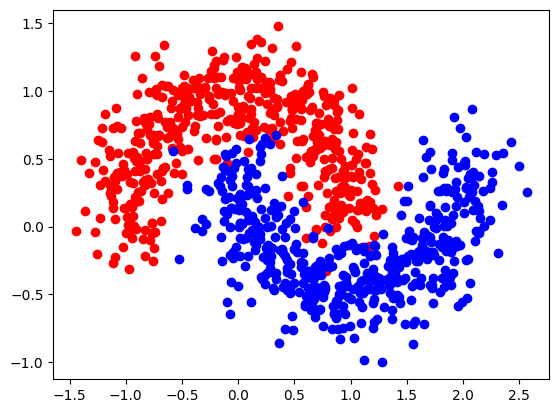

In [ ]:
#X, y = sklearn.datasets.make_moons(n_samples=1000, noise=0.3, random_state=42)
plt.plot(X[:,0][y==0], X[:,1][y==0],"ro")
plt.plot(X[:,0][y==1], X[:,1][y==1],"bo")

In [ ]:
y_score = rf.predict_proba(X_test)[:, 1]
y_score

array([1.        , 0.04      , 1.        , 0.        , 1.        ,
       1.        , 0.1       , 0.175     , 1.        , 0.01666667,
       0.01666667, 1.        , 0.04      , 1.        , 0.        ,
       0.92      , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.01666667,
       0.        , 0.        , 0.03333333, 0.        , 1.        ,
       0.93055556, 0.        , 0.29722222, 1.        , 0.        ,
       1.        , 0.73055556, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.025     , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.1       , 0.        , 0.        , 0.        , 0.84722222,
       0.        , 0.86722222, 1.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.92      , 1.        , 0.03333333, 0.04      , 0.075     ,
       1.        , 0.        , 0.        , 1.        , 0.7    

In [ ]:
cm = confusion_matrix(y_test, rf.predict(X_test))
cm

array([[129,   0],
       [  6, 115]])

In [ ]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_score)
thresholds

array([2.        , 1.        , 0.99722222, 0.94722222, 0.93055556,
       0.92      , 0.9       , 0.8       , 0.79722222, 0.73055556,
       0.59722222, 0.47833333, 0.37833333, 0.29722222, 0.225     ,
       0.12      , 0.1       , 0.08571429, 0.085     , 0.075     ,
       0.04      , 0.03333333, 0.025     , 0.01666667, 0.        ])

In [ ]:
auc = sklearn.metrics.roc_auc_score(y_test, y_score)

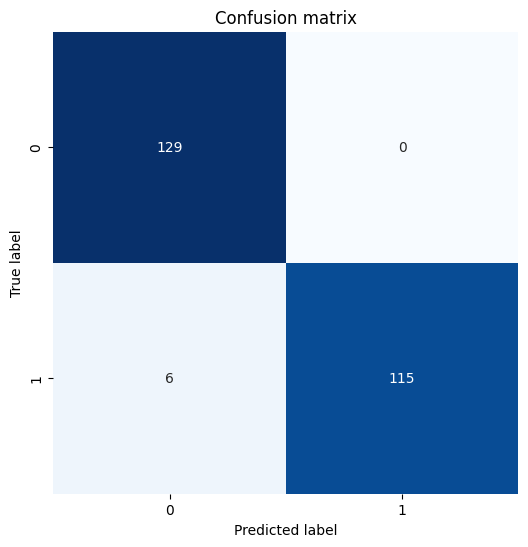

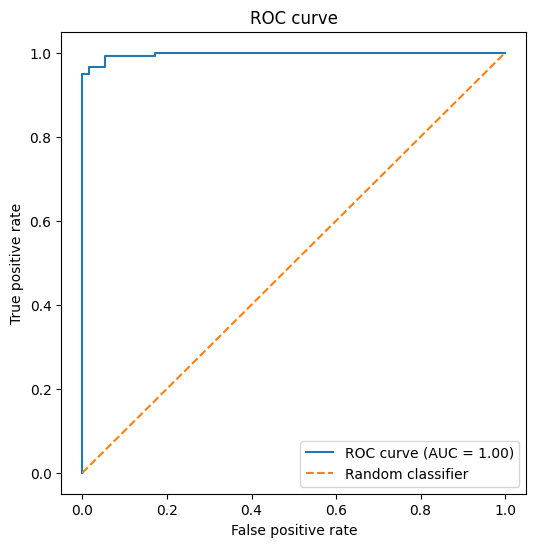

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

# Graficar la curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()


In [ ]:
y_score = rf.predict_proba(X_test)[:, 1]
y_score

array([1.        , 0.04      , 1.        , 0.        , 1.        ,
       1.        , 0.1       , 0.175     , 1.        , 0.01666667,
       0.01666667, 1.        , 0.04      , 1.        , 0.        ,
       0.92      , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.01666667,
       0.        , 0.        , 0.03333333, 0.        , 1.        ,
       0.93055556, 0.        , 0.29722222, 1.        , 0.        ,
       1.        , 0.73055556, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.025     , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.1       , 0.        , 0.        , 0.        , 0.84722222,
       0.        , 0.86722222, 1.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.92      , 1.        , 0.03333333, 0.04      , 0.075     ,
       1.        , 0.        , 0.        , 1.        , 0.7    

In [ ]:
rf = RandomForestClassifier(max_depth=10,min_samples_leaf=1, min_samples_split=5, n_estimators=10)
rf.fit(X_train, y_train);


In [ ]:
score = rf.score(X_test, y_test)
print(f"Test score: {score}")


Test score: 0.952


In [ ]:
# 0 == Blue
# 1 == Red

a = [0.5,0.5]
b = [1,-1]
new_data = [a,b]
predictions = rf.predict(new_data)
print(f"Predictions: {predictions}")

Predictions: [0 1]


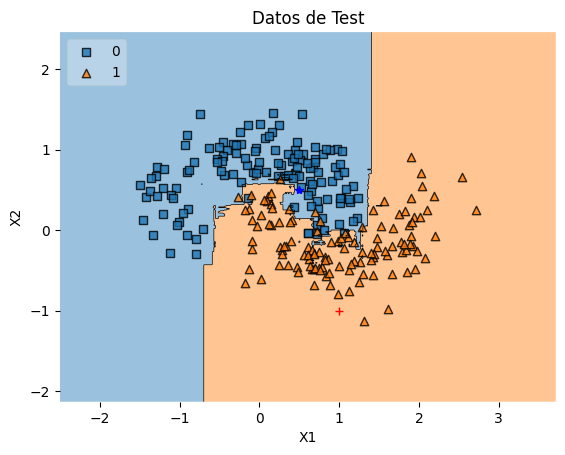

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test, y_test, clf=rf, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Datos de Test')

plt.plot(0.5,0.5,'b*')
plt.plot(1,-1,'r+')

plt.show()


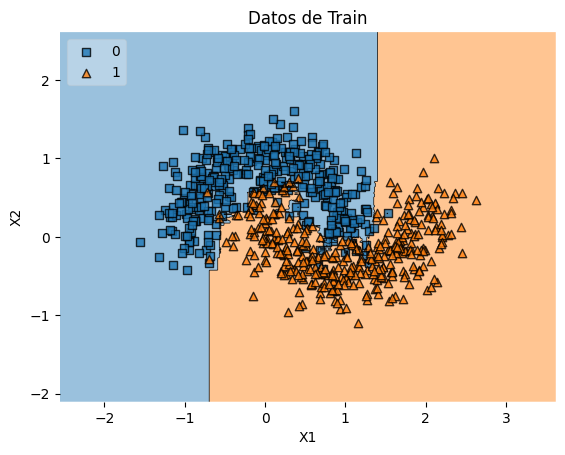

In [ ]:
plot_decision_regions(X_train, y_train, clf=rf, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Datos de Train')

plt.show()

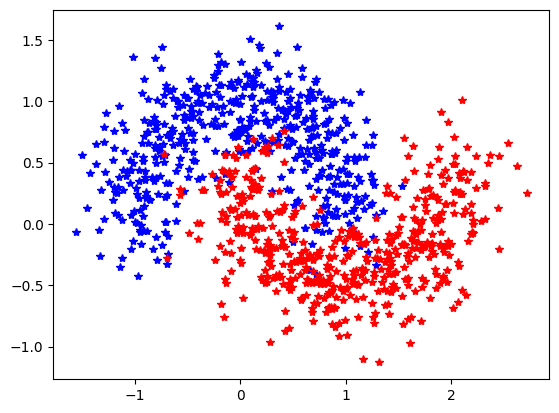

In [ ]:
blue_x = [X[i][0]for i in range(len(X[:,0])) if y[i] == 0]
blue_y = [X[i][1]for i in range(len(X[:,0])) if y[i] == 0]

red_x = [X[i][0]for i in range(len(X[:,0])) if y[i] == 1]
red_y = [X[i][1]for i in range(len(X[:,0])) if y[i] == 1]

plt.plot(blue_x , blue_y,'b*')
plt.plot(red_x , red_y,'r*')

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
Vp = cm[0,0]
Vn = cm[1,1]

Fp = cm[0,1]
Fn = cm[1,0]

print(f"True positives: {Vp}")
print(f"True negatives: {Vn}")

print(f"False positives: {Fp}")
print(f"False negative: {Fn}")


True positives: 124
True negatives: 114
False positives: 5
False negative: 7


In [ ]:
cm

array([[124,   5],
       [  7, 114]])